Fetching the Data from Nsepy Library

In [1]:
# Assuming you have a dataset with historical stock market data in CSV format

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [2]:
# Load the historical stock market data 

stock_data = pd.read_csv('data/NFLX.csv')

In [3]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


Preprocess the Data

In [4]:
# Extract relevant features for modeling (e.g., 'Close' price)
data = stock_data[['Close']].values

In [5]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [6]:
# Convert the dataset into sequences for LSTM
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:(i + sequence_length), 0]
        label = data[i + sequence_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

In [7]:
# Define sequence length (e.g., 3 days for simplicity)
sequence_length = 3

In [8]:
# Create sequences and labels
X, y = create_sequences(scaled_data, sequence_length)

In [9]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Build the Deep Learning Model (LSTM)

In [10]:
# Build the Deep Learning Model (LSTM)

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

d:\Projects\Stock Market Prediction using Deep Learning\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [12]:
# Train the Model

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - loss: 0.1959 - val_loss: 0.0921
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1058 - val_loss: 0.0360
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0389 - val_loss: 0.0146
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0153 - val_loss: 0.0076
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0078 - val_loss: 0.0024
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0024 - val_loss: 8.3279e-04
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011 - val_loss: 8.0341e-04
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.7308e-04 - val_loss: 7.5904e-04
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.3540e-04 - val_loss: 7.4833e-04
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.8558e-04 - val_loss: 7.2221e-04
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.7355e-04 - val_loss: 7.0747e-04
Epoch 12/20
23/23 ━━━━━

Model Evaluation

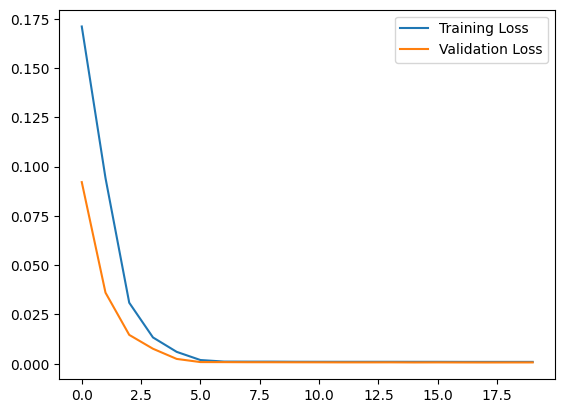

In [13]:
# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


Predict Future Stock Price

In [14]:
# Predictions on the test set
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step


In [15]:
# Inverse transform the predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

In [16]:
# Evaluate the model using regression metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 201.33479468544326
Root Mean Squared Error (RMSE): 14.18924926433542


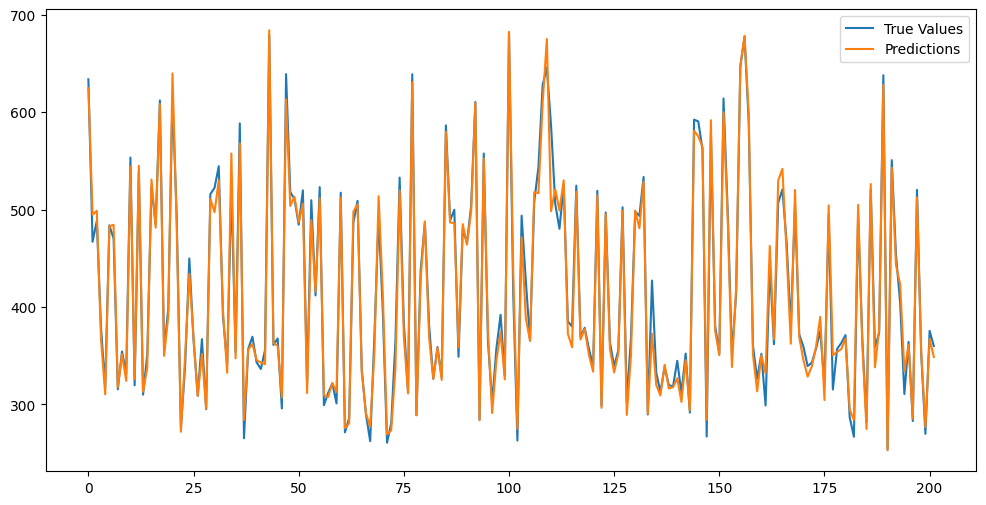

In [17]:
# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='True Values')
plt.plot(y_pred_inv, label='Predictions')
plt.legend()
plt.show()